# 03 Numpy

In [2]:
import numpy as np

The core of the `numpy` package is the `array` class. Let's examine that first. We can make an array out of a sequence, like a list.

In [3]:
d = [1, 2, 3, 4, 5]
np.array(d)

array([1, 2, 3, 4, 5])

### data types

Unlike lists, arrays must be homogeneous, in that the data types of each element must be the same. The data type of the array us upcast to be able to represent all of the data. So, if only one element is a float, all elements will be converted to floats.

In [4]:
d = [1, 2, 3.1415, 4, 5]
np.array(d)

array([ 1.    ,  2.    ,  3.1415,  4.    ,  5.    ])

You can query the datatype by examaning the dtype attribute of the array.

In [5]:
d = [1, 2, 3.1415, 4, 5]
arr = np.array(d)
arr.dtype

dtype('float64')

As we have seen before, arrays are like multidimensional sequences. We can create a 2D array by supplying a list of lists as the argument.

In [6]:
arr = np.array([[1., 2., 3.,], [4., 5., 6.]])
arr

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

### Array attributes

Arrays have a few other important attributes. Note attributes never have paretheses after them. Methods always do.

In [7]:
arr.size          # The number of elements in the array

6

In [8]:
arr.shape         # The shape of the array (i.e., the size of each dimension)

(2, 3)

In [9]:
arr.ndim          # The number of dimensions of the array

2

### Setting array shape

You can set the `array.shape` attribute to change the shape of the array. This attribute does not change the elements of the array, or how it is stored in memory, just how it is seen.

In [10]:
arr.shape = (3, 2)
arr

array([[ 1.,  2.],
       [ 3.,  4.],
       [ 5.,  6.]])

In [11]:
arr.shape = (6,)   # equivalent to arr.shape = (6, 1)
arr

array([ 1.,  2.,  3.,  4.,  5.,  6.])

In [12]:
arr.shape = (1, 6)
arr   # Note that there are *two* square brackets in the output sequence.

array([[ 1.,  2.,  3.,  4.,  5.,  6.]])

### Array methods

Arrays have a number of methods. Let's take a look at the 'mean' method as an example. 

In [13]:
arr = np.array([[1., 2., 3.,], [4., 5., 6.]])  # reset the array to our 2x3 array.

arr.mean()        # The mean of all of the elements in the array

3.5

Mean takes the optional argument `axis` that can be used to take the mean along a single axis of the array. Just like with indexing, the axes are reference in a zero-based system; `axis=0` means the first dimension. 

In [14]:
arr.mean(axis=0)  # The mean 

array([ 2.5,  3.5,  4.5])

In this case, there are two rows in the first dimension, and `arr.mean(axis=0)` takes the average in the 'row' direction, resulting in a 1D array that is the average of each column.

---
### *Exercise*

> Find the mean of the array in the 'column' direction, along `axis=1`.

> Use the `sum` method of the array class to get the sum of the numbers in each column. The result should be a 1D array with three elements.

---

You can also use the `reshape` method to change the shape of an array.

In [15]:
arr.shape

(2, 3)

## Array views

The data for an array may be storred in memory using `C` or `FORTRAN` ordered memory. Typically, there is no need to think about this, some details can be found [here](http://docs.scipy.org/doc/numpy-1.10.0/reference/internals.html).

However, it is important to remember that subsets of an array can produce a different 'view' of the array that addresses the same memory as the original array. This can lead to some unexpected behaviours. One way to think of this is that assignment in Python is more like a C-pointer (i.e., a reference to a memory location) than an actual value.

In [18]:
a = np.arange(10.0)
b = a[::2]
print(a)
print(b)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
[ 0.  2.  4.  6.  8.]


In [20]:
a[4] = -999   # this will modify b as well...
print(a)
print(b)

[   0.    1.    2.    3. -999.    5.    6.    7.    8.    9.]
[   0.    2. -999.    6.    8.]


In [23]:
b[-1] = -888  # this will modify a as well...
print(a)
print(b)

[   0.    1.    2.    3. -999.    5.    6.    7. -888.    9.]
[   0.    2. -999.    6. -888.]


Normally, this will not be a problem, but if you need to make sure that a subset of an array has it's own memory, make sure you make a `copy` of the array, like

In [28]:
a = np.arange(10.0)
b = a.copy()[::2]     # or np.copy(a)
a[4] = -999   # this will modify b as well...
print(a)
print(b)

[   0.    1.    2.    3. -999.    5.    6.    7.    8.    9.]
[ 0.  2.  4.  6.  8.]


## Vectorization

The best way to do mathematical operations using numpy arrays is to do `vector` operations. That is, mathematical operations are defined to be element by element, and this is done much faster than looping. As a rule of thumb, you should be very concerned if your code has more than one significant `for` loop in the numerical analysis section.

In [38]:
a = np.arange(1024.0).reshape(4, 8, 16, 2)   # a 4D array using sequential numbers
b = np.random.rand(4, 8, 16, 2)              # a 4D array using random numbers

sol = a * b       # element-by-element multiplication

## Array broadcasting

Arrays may be operated on using vector operations even if they are different sized, however, they need to follow the rules of `array broadcasting`.  One way to think of this is that a larger dimension will be 'broadcast' across a singleton dimension. Generally, all of the dimensions need to be either the same size, or one of the dimensions should be of size 1. Arrays always have as many 'singleton' dimensions to the left as needed.  For example, these arrays will all 'broadcast'

      a: 5 x 7 x 1 x 8
      b:             8
      c:     7 x 3 x 8
      d: 5 x 1 x 3 x 1
    
    sol: 5 x 7 x 3 x 8   

Let's create these arrays with random numbers

In [43]:
a = np.random.rand(5, 7, 1, 8)
b = np.random.rand(8)
c = np.random.rand(7, 3, 8)
d = np.random.rand(5, 1, 3, 1)
print(a.shape, b.shape, c.shape, d.shape)

sol = a * b * c * d
print(sol.shape)

((5, 7, 1, 8), (8,), (7, 3, 8), (5, 1, 3, 1))
(5, 7, 3, 8)


---
### *Exercise*

> Experiment with multiplying just two of the arrays together. Try to predict the resulting shape.

---

## Linear algebra

One of the key elements of the `numpy` package is the `numpy.linalg` subpackage that contains a number of linear algebra functions that work efficiently on arrays.

In [54]:
a = np.random.randn(100, 100)
e, v = np.linalg.eig(a)

b = np.random.randn(500, 200)
u, s, v = np.linalg.svd(b)

## Basic performance evaluation

We can do some very basic perfomance testing using the `%time` special function in ipython notebooks. Lets use this to examine the time it takes to do a singular value decomposition for different sized matricies.

In [60]:
b = np.random.randn(500, 200)
%time u, s, v = np.linalg.svd(b)

CPU times: user 49.4 ms, sys: 10.5 ms, total: 59.9 ms
Wall time: 33.1 ms


If the time might change, say based on the values chosen, the `%timeit` function can be used to perform the test a number of times to get an average calculation time.

In [61]:
%timeit b = np.random.randn(50, 20); u, s, v = np.linalg.svd(b)

1000 loops, best of 3: 225 µs per loop


## Overview of scipy packages

The `scipy` package contains a number of specialized numerical computational tools. These tools are usually very specific, and in the case of the linear algebra tools, may be optimized for your particular hardware.

     cluster                      --- Vector Quantization / Kmeans
     fftpack                      --- Discrete Fourier Transform algorithms
     integrate                    --- Integration routines
     interpolate                  --- Interpolation Tools
     io                           --- Data input and output
     lib                          --- Python wrappers to external libraries
     lib.lapack                   --- Wrappers to LAPACK library
     linalg                       --- Linear algebra routines
     misc                         --- Various utilities that don't have
                                      another home.
     ndimage                      --- n-dimensional image package
     odr                          --- Orthogonal Distance Regression
     optimize                     --- Optimization Tools
     signal                       --- Signal Processing Tools
     sparse                       --- Sparse Matrices
     sparse.linalg                --- Sparse Linear Algebra
     sparse.linalg.dsolve         --- Linear Solvers
     sparse.linalg.dsolve.umfpack --- :Interface to the UMFPACK library:
                                      Conjugate Gradient Method (LOBPCG)
     sparse.linalg.eigen.lobpcg   --- Locally Optimal Block Preconditioned
                                      Conjugate Gradient Method (LOBPCG) [*]
     special                      --- Airy Functions [*]
     lib.blas                     --- Wrappers to BLAS library [*]
     sparse.linalg.eigen          --- Sparse Eigenvalue Solvers [*]
     stats                        --- Statistical Functions [*]
     lib                          --- Python wrappers to external libraries
                                      [*]
     lib.lapack                   --- Wrappers to LAPACK library [*]
     integrate                    --- Integration routines [*]
     ndimage                      --- n-dimensional image package [*]
     linalg                       --- Linear algebra routines [*]
     spatial                      --- Spatial data structures and algorithms
     special                      --- Airy Functions
     stats                        --- Statistical Functions


In [62]:
import scipy   # This actually does nothing. Submodules must be explicitly imported

## `scipy.stats`

In [66]:
import scipy.stats

In [76]:
rv = scipy.stats.laplace(loc=0, scale=1)
rv.pdf(np.linspace(-3, 3, 101))    # create a pdf of the laplace distribution with parameters loc=0, scale=1

array([ 0.02489353,  0.02643286,  0.02806738,  0.02980297,  0.03164588,
        0.03360276,  0.03568063,  0.037887  ,  0.0402298 ,  0.04271748,
        0.04535898,  0.04816382,  0.0511421 ,  0.05430455,  0.05766256,
        0.06122821,  0.06501436,  0.06903462,  0.07330348,  0.07783632,
        0.08264944,  0.0877602 ,  0.09318699,  0.09894935,  0.10506804,
        0.11156508,  0.11846388,  0.12578928,  0.13356765,  0.14182701,
        0.15059711,  0.15990951,  0.16979776,  0.18029747,  0.19144644,
        0.20328483,  0.21585526,  0.22920301,  0.24337613,  0.25842567,
        0.27440582,  0.29137413,  0.3093917 ,  0.32852341,  0.34883816,
        0.37040911,  0.39331393,  0.41763511,  0.44346022,  0.47088227,
        0.5       ,  0.47088227,  0.44346022,  0.41763511,  0.39331393,
        0.37040911,  0.34883816,  0.32852341,  0.3093917 ,  0.29137413,
        0.27440582,  0.25842567,  0.24337613,  0.22920301,  0.21585526,
        0.20328483,  0.19144644,  0.18029747,  0.16979776,  0.15

In [75]:
r = scipy.stats.laplace.rvs(size=1000) # Generate 1000 random numbers based on the laplace distribution
r

array([  5.08085355e-01,   6.77504356e-01,   6.18632384e-01,
         9.93174161e-01,  -9.65876650e-01,   1.04189578e+00,
         2.01551251e-01,  -1.77998856e+00,  -5.24858114e-01,
         3.31132756e-01,   1.15712688e+00,   4.55948867e-01,
        -7.15281884e-01,   4.44971326e-01,  -3.45735652e-01,
        -2.29423878e+00,   1.18204842e+00,   1.27521959e+00,
        -5.94673002e-01,  -8.42419001e-02,   7.21474649e-01,
        -4.39384714e-01,   1.80042192e-02,   1.23734978e+00,
         4.19564079e+00,  -3.72703353e-02,  -7.87243573e-01,
        -9.00689704e-01,  -2.07045058e+00,   3.80240333e-01,
        -1.06482015e+00,   2.74345605e+00,  -8.28299425e-01,
         2.45545279e+00,  -7.10164877e-01,  -1.84399768e+00,
         2.23795009e+00,   2.07578135e-01,   3.11807037e-01,
        -3.29286734e-02,   3.13466044e+00,  -3.81443569e-01,
        -8.85958035e-01,  -6.84075990e-02,   1.02907375e+00,
         2.05006678e+00,  -8.36560551e-01,   2.87728473e-01,
         1.87940620e+00,

## `scipy.integrate`

In [109]:
import scipy.integrate

sigma=10.0
beta=8.0/3.0
rho=28.0

def lorenz(state, to):
    x, y, z = state
    xdot = sigma*(y-x)
    ydot = x*(rho-z)-y
    zdot = x*y - beta*z
    return (xdot, ydot, zdot)
    
t = np.linspace(0, 30, 3000)
sol = scipy.integrate.odeint(lorenz, (1., 2., 3.), t)
x, y, z = sol.T

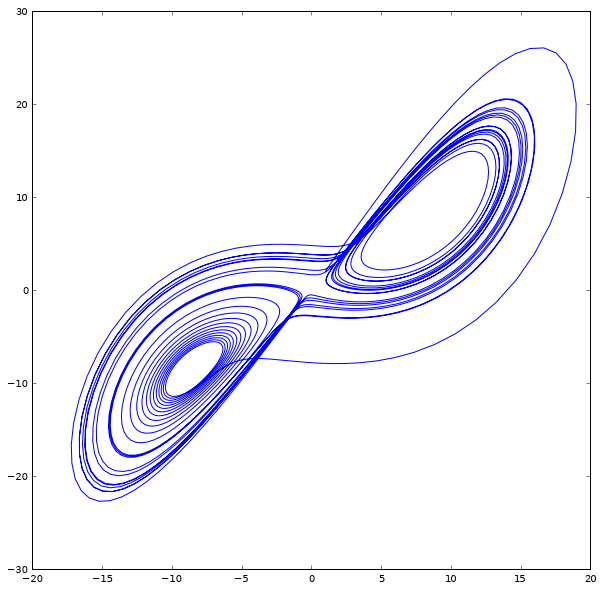

In [114]:
import matplotlib.pyplot as plt
% matplotlib inline

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(x, y)